In [62]:

from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim_models
import jieba.posseg as jp,jieba
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib

In [44]:
df1 = pd.read_csv('./reuse post/so details.txt')
df1.info()
df1.head(2)

df1['Tags'] = df1['Tags'].apply(lambda x: x.replace('java', ''))
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77599 entries, 0 to 77598
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   77599 non-null  object 
 1   Title          77599 non-null  object 
 2   Tags           77599 non-null  object 
 3   Score          77599 non-null  int64  
 4   AnswerCount    77599 non-null  int64  
 5   CommentCount   77599 non-null  int64  
 6   FavoriteCount  18366 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount
0,2015-09-17T01:13:13.000,Printing to log returns null pointer error - A...,android nullpointerexception null,-1,1,5,NaN
1,2015-11-14T09:53:47.090,Only part of an activity being called upon (An...,android,0,1,7,NaN


In [57]:
text = df1['Title'] + pd.Series([' ']*len(df1)) + df1['Tags']
text = text.to_list()
print(len(text))
text[:5]


77599


['Printing to log returns null pointer error - Android  android nullpointerexception null',
 'Only part of an activity being called upon (Android studio, java)  android',
 'Run maven command from docker image  maven docker continuous-integration gitlab',
 'black activity giving error android studio  android android-studio android-gradle-plugin',
 "Inconsistency in Java's compareTo method on Strings  comparator"]

In [47]:
def separate_sentence(text):
    text = text.lower()
    remove_chars = '[·’!"\#$%&\'()＃！（）*+,-./:;<=>?\@，：?￥★、…．＞【】［］《》？“”‘’\[\\]^_`{|}~]+'
    text = re.sub(remove_chars, "", text)

    disease_List = nltk.word_tokenize(text)

    filtered = [w for w in disease_List if(w not in stopwords.words('english'))]

    Rfiltered =nltk.pos_tag(filtered)

    filter_word = [i[0] for i in Rfiltered]
    return filter_word


In [58]:
text = [separate_sentence(i) for i in tqdm(text)]
print(len(text))

100%|██████████| 77599/77599 [03:24<00:00, 378.96it/s]


77599


In [59]:

dictionary = Dictionary(text)

corpus = [dictionary.doc2bow(words) for words in text]

def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)

def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=text, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()




In [70]:
x = range(1,30)
z = [perplexity(i) for i in x]
# y = [coherence(i) for i in x]

[(0, '0.027*"java" + 0.026*"android" + 0.013*"spring" + 0.010*"using" + 0.008*"file" + 0.007*"string" + 0.007*"class" + 0.006*"error" + 0.006*"swing" + 0.006*"hibernate" + 0.006*"method" + 0.005*"json" + 0.005*"eclipse" + 0.005*"object" + 0.004*"get"')]
-7.871948400969058
[(0, '0.028*"spring" + 0.024*"java" + 0.016*"file" + 0.014*"class" + 0.011*"using" + 0.010*"json" + 0.010*"eclipse" + 0.009*"xml" + 0.008*"error" + 0.008*"maven" + 0.008*"springboot" + 0.006*"method" + 0.006*"jsp" + 0.005*"regex" + 0.005*"springmvc"'), (1, '0.049*"android" + 0.030*"java" + 0.014*"string" + 0.011*"hibernate" + 0.011*"swing" + 0.009*"using" + 0.008*"array" + 0.008*"arrays" + 0.007*"list" + 0.006*"arraylist" + 0.006*"jpa" + 0.005*"mysql" + 0.005*"object" + 0.005*"data" + 0.005*"value"')]
-7.823149683251762
[(0, '0.051*"spring" + 0.022*"swing" + 0.022*"hibernate" + 0.016*"java" + 0.015*"springboot" + 0.011*"jpa" + 0.011*"mysql" + 0.010*"using" + 0.010*"database" + 0.009*"springmvc" + 0.008*"jdbc" + 0.008*

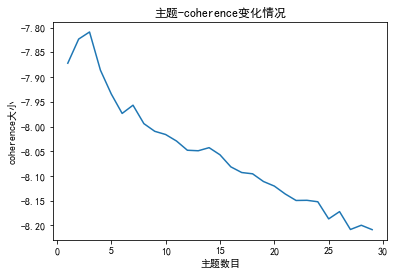

In [71]:
plt.plot(x, z)
plt.xlabel('topic nums')
plt.ylabel('coherence')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('tpoic-coherence')
plt.show()

In [72]:

dictionary = Dictionary(text)

corpus = [dictionary.doc2bow(words) for words in text]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=100, iterations=50)

ldaCM = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')


for topic in lda.print_topics(num_words=10):
    print(topic)


(0, '0.041*"spring" + 0.017*"hibernate" + 0.015*"java" + 0.013*"springboot" + 0.012*"maven" + 0.011*"using" + 0.010*"eclipse" + 0.010*"error" + 0.009*"file" + 0.009*"jpa"')
(1, '0.034*"java" + 0.019*"android" + 0.017*"swing" + 0.017*"class" + 0.015*"json" + 0.011*"method" + 0.010*"using" + 0.010*"object" + 0.009*"jsp" + 0.008*"multithreading"')
(2, '0.057*"android" + 0.030*"java" + 0.020*"string" + 0.012*"array" + 0.012*"arrays" + 0.012*"xml" + 0.010*"list" + 0.010*"arraylist" + 0.008*"using" + 0.007*"file"')


In [73]:

plot =pyLDAvis.gensim_models.prepare(lda,corpus,dictionary, sort_topics=False)

pyLDAvis.save_html(plot, './pic/reuse_post.html')

